In [52]:
import numpy as np
import math
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [53]:
loadDiabetes = load_diabetes()
X_train, X_test, Y_train, Y_test = train_test_split(loadDiabetes['data'], 
    loadDiabetes['target'], random_state=2705)

In [54]:
print(X_train)

[[ 0.08166637  0.05068012 -0.00297252 ...  0.03430886 -0.00060925
  -0.0010777 ]
 [-0.02730979  0.05068012  0.06061839 ...  0.03430886  0.03781448
   0.04862759]
 [-0.02730979  0.05068012 -0.00728377 ... -0.03949338 -0.08238148
  -0.02593034]
 ...
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]
 [ 0.03081083  0.05068012 -0.00836158 ... -0.00812743 -0.02952762
   0.0569118 ]
 [-0.02004471 -0.04464164 -0.0547075  ... -0.03949338 -0.07408887
  -0.0052198 ]]


In [55]:
print(X_test)

[[-0.09632802 -0.04464164 -0.06979687 ... -0.03949338 -0.04687948
  -0.07977773]
 [-0.09996055 -0.04464164 -0.06764124 ... -0.03949338 -0.04986847
  -0.00936191]
 [-0.00188202  0.05068012  0.01427248 ... -0.00259226  0.01919903
   0.00306441]
 ...
 [ 0.03444337 -0.04464164 -0.00728377 ... -0.03949338 -0.02139368
   0.00720652]
 [ 0.02354575  0.05068012 -0.03961813 ... -0.03949338 -0.10164355
  -0.06735141]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845911
  -0.03835666]]


In [56]:
print(Y_train)

[139. 186.  52. 258.  90. 120. 116.  49. 270. 225. 178. 163.  55. 202.
  88.  86. 161. 200. 111. 215. 122. 135. 200. 281. 136. 142. 182. 275.
 200. 295. 181. 173.  97.  55.  97. 232. 173. 170. 147. 137. 123. 175.
  47. 110. 230. 187. 272. 263. 232.  94. 214. 138. 310. 118. 190. 302.
 242. 198. 155. 131.  85. 277. 246. 202.  43. 253. 128. 107. 292.  83.
  31.  75.  99. 311.  89. 220. 198.  71. 222.  98. 248.  48. 140. 283.
 233. 167. 152.  69.  84. 154. 206. 212.  59.  54. 257.  65. 111. 104.
  53. 281. 111.  42.  72.  84.  50. 150.  97. 152. 296. 245. 217. 262.
  49. 259. 179.  70.  64.  88.  91. 153. 220.  48. 121.  65. 220. 243.
 292. 172. 150.  90. 202. 108.  52.  63.  83. 252. 132. 197. 261.  81.
  74.  52.  51. 164. 141. 144. 128. 197.  67.  88.  84.  51. 131. 185.
  74.  53. 219. 310. 151. 180.  92. 341. 170. 321. 214. 200.  67.  55.
 265.  79.  71. 243.  91.  80. 138.  69.  68. 236. 132. 258. 214. 178.
  63.  49. 288. 100. 189.  72. 113. 168. 148. 145. 115. 332.  52.  42.
  96. 

In [57]:
print(Y_test)

[158.  55.  90.  48.  87.  72. 248. 118. 206. 208. 346.  77.  47.  72.
  45. 162. 102.  53. 101. 140. 109. 160. 199.  72.  85. 248. 242. 268.
  44. 190. 259. 317. 274. 178. 144. 158. 270. 221. 113. 172. 135. 137.
 235. 209. 164.  51.  96. 185. 134. 237.  73.  94. 174.  88.  75.  58.
 160.  64. 178.  66. 121.  78. 115. 293.  60. 129. 196.  77.  37.  63.
 142. 109. 182. 185. 101. 110.  84. 139. 237. 242. 180. 225. 184. 127.
 297. 134. 264. 201. 156.  71.  66. 104. 128.  96. 141.  96. 198.  59.
  70. 257.  40. 241. 166. 220. 179.  85.  95.  97. 155.  78.  64.]


In [58]:
lasso = Lasso().fit(X_train,Y_train)
print(lasso.score(X_train,Y_train), "Traning set r2 with default parameters")
print(lasso.score(X_test,Y_test), "Test set r2 with default parameters")
print(lasso.coef_ != 0)
print(loadDiabetes['feature_names'])

0.3580505128421285 Traning set r2 with default parameters
0.3878055097417916 Test set r2 with default parameters
[False False  True  True False False False False  True False]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Training set r2 with default parameters = 0.3580505128421285

Test set r2 with default parameters = 0.3878055097417916

Number of feature used = 3

Names of features used = bmi, bp, s5

In [59]:
DData = np.genfromtxt("diabetes.txt", delimiter="\t", usecols=np.arange(10))
DLabel = np.genfromtxt("diabetes.txt", delimiter="\t",usecols=10, dtype='int')
DX_train, DX_test, DY_train, DY_test = train_test_split(DData, 
    DLabel, random_state=2705)

In [60]:
Dlasso = Lasso().fit(DX_train,DY_train)
print(Dlasso.score(DX_train,DY_train), "Traning set r2 with default parameters")
print(Dlasso.score(DX_test,DY_test), "Test set r2 with default parameters")
print(Dlasso.coef_ != 0)
DFeatures = ["AGE", "SEX", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"]
print(DFeatures)

0.5074495146354505 Traning set r2 with default parameters
0.5162385373580862 Test set r2 with default parameters
[ True  True  True  True  True False  True False  True  True]
['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']


Training set r2 with default parameters = 0.5074495146354505 

Test set r2 with default parameters = 0.5162385373580862 

Number of feature used = 8

Names of features used = Age, Sex, Bmi, Bp, S1, S3, S5, S6

Compared to the other data set, we saw an increase in both r2 values and an increase in features used.

In [61]:
scaler = StandardScaler()
scaler.fit(DX_train)
DX_train_scaled = scaler.transform(DX_train)
scaler.fit(DX_test)
DX_test_scaled = scaler.transform(DX_test)

In [62]:
Dlasso_scaled = Lasso().fit(DX_train_scaled,DY_train)
print(Dlasso_scaled.score(DX_train_scaled,DY_train), "Scaled traning set r2 with default parameters")
print(Dlasso_scaled.score(DX_test_scaled,DY_test), "Scaled test set r2 with default parameters")
print(Dlasso_scaled.coef_ != 0)
print(DFeatures)

0.5078944872911413 Scaled traning set r2 with default parameters
0.4896118566008991 Scaled test set r2 with default parameters
[False  True  True  True  True False  True False  True  True]
['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']


After scaling my results, i noticed that they are far closer to the results in item 6 than in item 3, with the training set actually increasing the r2 value.

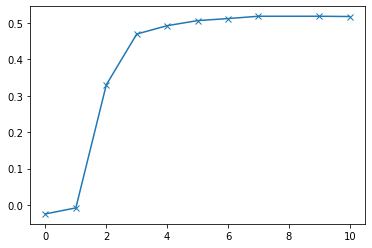

In [93]:
alphaIterator = 0.3
LassoArray=[]
while alphaIterator <= 50:
    alphaIterator += 0.1
    current = Lasso(alpha=alphaIterator).fit(DX_train_scaled,DY_train)
    if len(LassoArray) == 0:
        LassoArray.append(current)
    elif sum(current.coef_ != 0) == sum(LassoArray[-1].coef_ !=0):
        pass
    else:
        LassoArray.append(current)
coef_number = []
r2_score = []
for i in LassoArray:
    count = 0
    for j in i.coef_ != 0:
        if j:
            count += 1
    coef_number.append(count)
    r2_score.append(i.score(DX_test_scaled,DY_test))
            


plt.plot(coef_number, r2_score, marker = 'x', label="test r2 against number of ceofficients")         


At 6 features, we see the highest test r2 however, another point of note is between 1 and 2 where we see a massive increase in the test r2 value, compared to the relatively small increase between 0 and 1.

In [75]:
param_grid = {'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(Lasso(), param_grid)
grid_search.fit(DX_train_scaled,DY_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


best_score = 0
for alpha in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    lasso = Lasso(alpha=alpha)
    score = cross_val_score(lasso, DX_train_scaled, DY_train, cv=5)
    score = np.mean(score)
    if score > best_score:
        best_score = score
        best_alpha = alpha
lasso = Lasso(alpha = best_alpha).fit(DX_train_scaled,DY_train)
test_lasso = lasso.score(DX_train_scaled,DY_train)
print("\n")
print(test_lasso, "test scores with best parameter")
print(np.sum(lasso.coef_ !=0), "coefficients used")
print(best_alpha, "alpha used for best score")

{'alpha': 1}
0.4709510848981438


0.5078944872911413 test scores with best parameter
7 coefficients used
1 alpha used for best score


In [74]:
DX_train_pr, DX_Cali, DY_train_pr, DY_Cali = train_test_split(DX_train, 
    DY_train, test_size=99, random_state=2705)
print("Sizes of train Proper and Calibration", DX_train_pr.shape[0], DX_Cali.shape[0])

Sizes of train Proper and Calibration 232 99 232 99


In [66]:
scaler.fit(DX_train_pr)
DX_train_pr_scaled = scaler.transform(DX_train_pr)
DX_Cali_scaled = scaler.transform(DX_Cali)
DX_test_scaled = scaler.transform(DX_test)

In [73]:
#a = (trueLabel - Prediction)Positive
best_score = 0
for alpha in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    lasso = Lasso(alpha=alpha)
    score = cross_val_score(lasso, DX_train_pr_scaled, DY_train_pr)
    score = np.mean(score)
    if score > best_score:
        best_score = score
        best_alpha = alpha
print(best_score, best_alpha)

print(DY_train_pr)
print(DX_train_pr_scaled)

print(DY_Cali)
print(DX_Cali_scaled)

0.46025215717813894 1
[154 170  71 116 167 230  60 118  39  99  43 281  90 229 217 252 152 137
  89 246 145 128 257  52 281 140 132 178 102 222 131 181 151 242 258  52
 200  87 296 265  84 109 277 115  97 148  68 200 225 187 202 139 121 110
  97 143  55 131 150 245 104  50 262 281 163 144 146  69 303  55  94 243
 275  90 163 142 151 198 263  84 123 202 268 126  65 292 270 150 332 114
 311  84  54  83 124  98  93 168 249  63  31 102 265  51 246  57 122  88
 152 172 206 210  72 341  63  74 200 168 220 141 147  67  67 111 104 131
  96 276 155  71  39 113  90 306 283 248 173 288 189 144 100 216 197 101
 116 120 168 236 124  92 103  80 107  68  48  99  61 272  86 179 150 283
 177 181 183  42 244  77 173  49 185 277 153  51 263  52 144  85 111  88
 142 143 245 275 217  97 138  95  65  47 132 219 192 182  72 321 258 180
  72 252 310 253 109  83  70 275  65  83  77  85 131  59 197 170  71  88
 261 235 200  81  53 122  64 164 128  42 281 215  81 125  49  91]
[[ 0.17276893 -0.94137074 -0.6426213